In [3]:
# This project is to create a machine learning model to train the model to predict laptop prices. 
# The dataset is a variety of laptop specifications and the price of each device in Euros
# All code was composed by Victory Okezie

In [23]:
#First i import all the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [24]:
#now i open the dataset from jupyter 
The_Dataset = open('laptop.csv')

In [25]:
df = pd.read_csv('laptop.csv')

In [26]:
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [27]:
print(df.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

In [28]:
# now we check for missing values and data types, if we have missing values we will clean it
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [29]:
print(df.isnull().sum())

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64


In [30]:
print(df.isnull().mean() * 100)

Company                0.0
Product                0.0
TypeName               0.0
Inches                 0.0
ScreenResolution       0.0
CPU_Company            0.0
CPU_Type               0.0
CPU_Frequency (GHz)    0.0
RAM (GB)               0.0
Memory                 0.0
GPU_Company            0.0
GPU_Type               0.0
OpSys                  0.0
Weight (kg)            0.0
Price (Euro)           0.0
dtype: float64


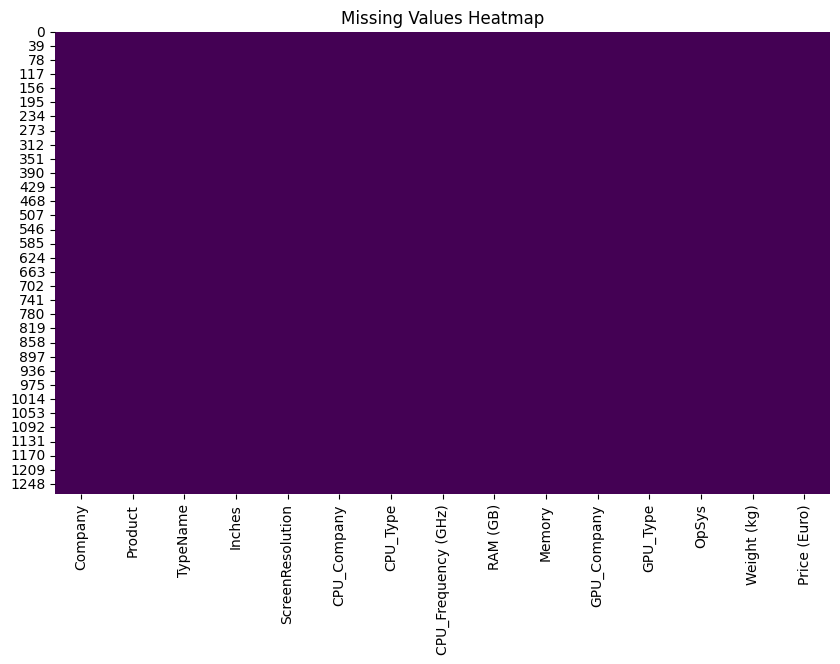

In [31]:
#it seems we dont have any missing values in our entire dataset therefore it looks clean. But to verify we will use 
#seaborn and matplotlib libary to find any missing values that will be represented in yellow 
#(or the color corresponding to True), and non-missing values will be shown in purple (or the color corresponding to False).

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [56]:
#as there is no yellow color therefore our data is clean

In [57]:
#we will use one-hot encoding to convert categorical columns like Product, TypeName, CPU_Company, etc., into binary columns, making them suitable for machine learning algorithms.
data = pd.get_dummies(df, drop_first=True)
#We use drop_first=True to avoid the "dummy variable trap"

In [58]:
#we seperate the price variable from the column to use as a target variable to make the prediction
x = data.drop('Price (Euro)', axis=1)  # Features: all columns except 'Price'
y = data['Price (Euro)']  # Target variable: 'Price'

In [59]:
#We use StandardScaler to scale all the features, ensuring that they all have the same scale
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [60]:
#We now split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)


In [61]:
#We will now use a model to train it using the training data.
#I like using the linear regression 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [62]:
#now we predict the price 
y_pred = lr_model.predict(X_test)

In [63]:
#we evaluate the model using this:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [64]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 4.071305438256234e+16
Mean Squared Error (MSE): 6.199158758147171e+33
R-squared: -1.0589501380944472e+28


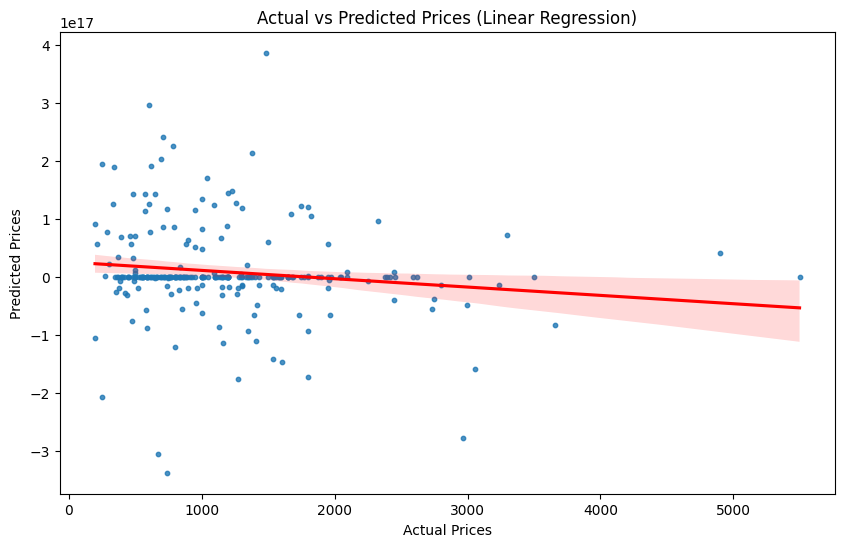

In [66]:
#now we visualize the result
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [69]:
#from the above graph we can see that the model predicts a fall in price
